In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_colors
import pandas as pd
import pandas.plotting as pd_plt
import mglearn
import seaborn as sns
from IPython.display import display
from sklearn.datasets import load_breast_cancer 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.manifold import TSNE

<h1>Метод главных компонент</h1>

<h3>Визуализация cancer</h3>

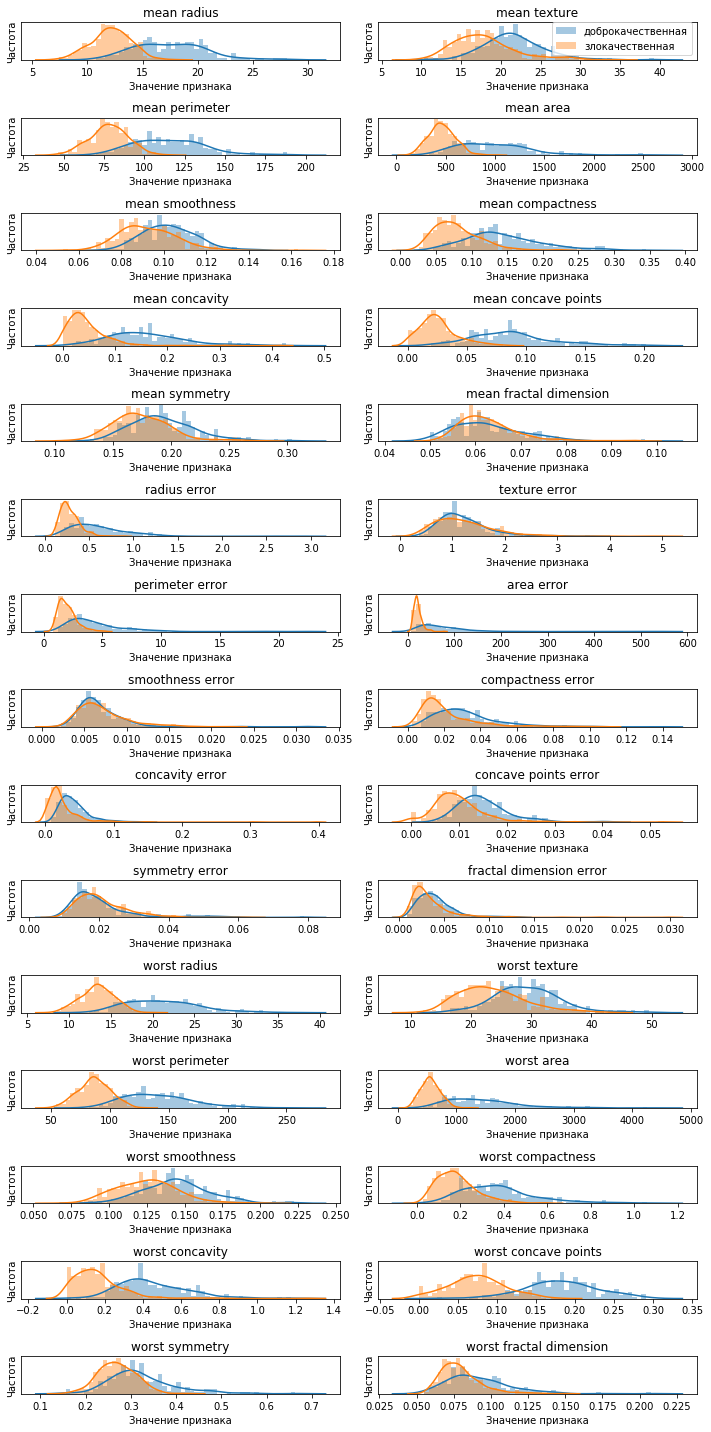

In [3]:
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20)) 
malignant = cancer.data[cancer.target == 0] 
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    sns.distplot(malignant[:, i], bins=bins, kde=True, rug=False,ax=ax[i])
    sns.distplot(benign[:, i],bins=bins, kde=True, rug=False, ax=ax[i])

    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Значение признака")
    ax[i].set_ylabel("Частота")
ax[1].legend(["доброкачественная", "злокачественная"], loc="best") 
fig.tight_layout()

plt.show()

<h3>Найдем 2 главные компоненты</h3>

In [5]:
scaler = StandardScaler() 
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# оставляем первые две главные компоненты
pca = PCA(n_components=2)
# применяем PCA с заданным количеством компонент на breast cancer 
pca.fit(X_scaled)
# преобразуем данные на две главные компоненты
X_pca = pca.transform(X_scaled)

print("Размер исходных данных: {}".format(str(X_scaled.shape)))
print("Размер преобразованных PCA данных: {}".format(str(X_pca.shape)))

Размер исходных данных: (569, 30)
Размер преобразованных PCA данных: (569, 2)


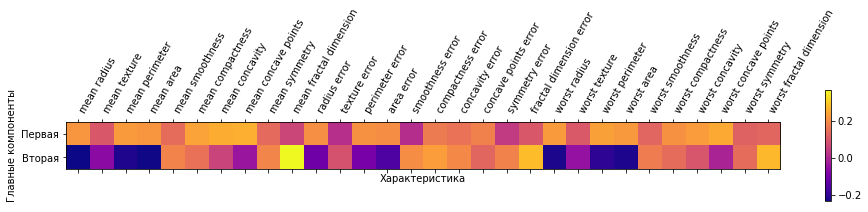

In [6]:
plt.matshow(pca.components_, cmap='plasma')
plt.yticks([0, 1], ["Первая", "Вторая"]) 
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left') 
plt.xlabel("Характеристика")
plt.ylabel("Главные компоненты")
plt.show()

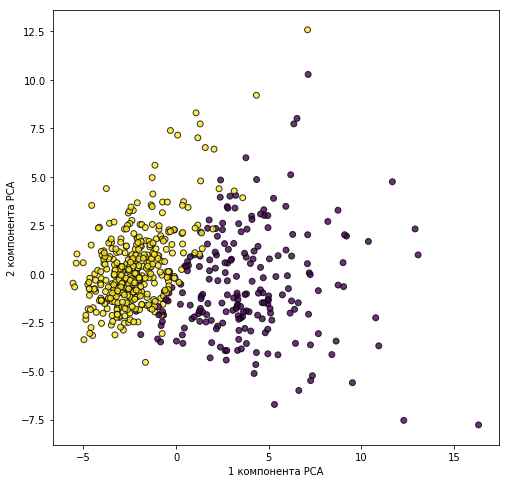

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target, marker='o',
            s=35, edgecolor='k', alpha=.8) 
plt.xlabel("1 компонента PCA")
plt.ylabel("2 компонента PCA")
plt.show()

<h3>Найдем 4 главные компоненты</h3>

In [8]:
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# оставляем первые четыре главные компоненты
pca = PCA(n_components=4)
# применяем PCA с заданным количеством компонент на breast cancer 
pca.fit(X_scaled)
# преобразуем данные на 4 главные компоненты
X_pca = pca.transform(X_scaled)

print("Размер исходных данных: {}".format(str(X_scaled.shape)))
print("Размер преобразованных PCA данных: {}".format(str(X_pca.shape)))

Размер исходных данных: (569, 30)
Размер преобразованных PCA данных: (569, 4)


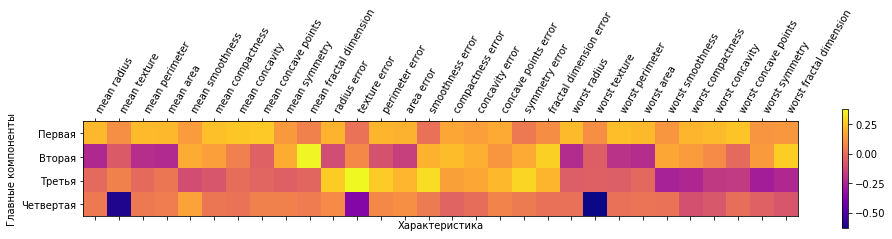

In [9]:
plt.matshow(pca.components_, cmap='plasma')
plt.yticks([0, 1, 2, 3], ["Первая", "Вторая","Третья","Четвертая"]) 
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left') 
plt.xlabel("Характеристика")
plt.ylabel("Главные компоненты")
plt.show()

In [11]:
data=pd.concat( [
    pd.DataFrame(X_pca,columns=['pca1','pca2', 'pca3','pca4']),
    pd.DataFrame(cancer.target,columns=['class'])
    ],axis=1 )
display(data.head(5))

,pca1,pca2,pca3,pca4,class
0,9.192837,1.948583,-1.123166,3.633731,0
1,2.387802,-3.768172,-0.529293,1.118264,0
2,5.733896,-1.075174,-0.551748,0.912083,0
3,7.122953,10.275589,-3.232790,0.152547,0
4,3.935302,-1.948072,1.389767,2.940639,0


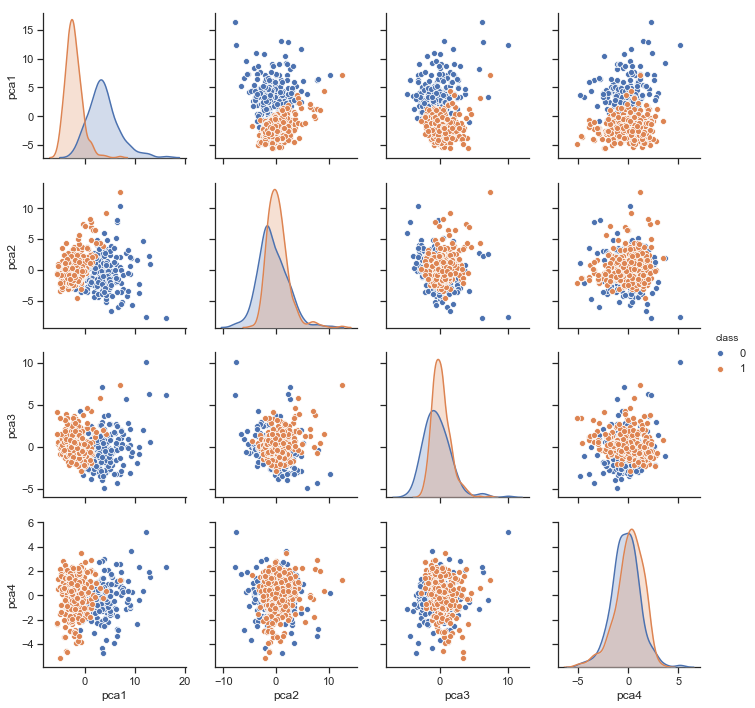

In [12]:
sns.set(style="ticks")
sns.pairplot(data,hue="class",vars=['pca1','pca2', 'pca3','pca4'])
plt.show()

<h3>Помогает не всегда</h3>

In [9]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer['data'],     # данные класса    (x)
    cancer['target'],   # индексы класса   (y)
    random_state=0      # важный параметр при моделировании
)

# Обучение без PCA

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

# Обучение на PCA
pca = PCA(n_components=4, whiten=True, random_state=0).fit(X_train) # Важно whiten !!!

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model_pca = KNeighborsClassifier(n_neighbors=1)
model_pca.fit(X_train_pca, y_train)

print("Правильность тестового набора без PCA: {:.2f}".format(model.score(X_test, y_test)))
print("Правильность тестового набора с PCA: {:.2f}".format(model_pca.score(X_test_pca, y_test)))


Правильность тестового набора без PCA: 0.92
Правильность тестового набора с PCA: 0.94


<h1> t-SNE</h1>

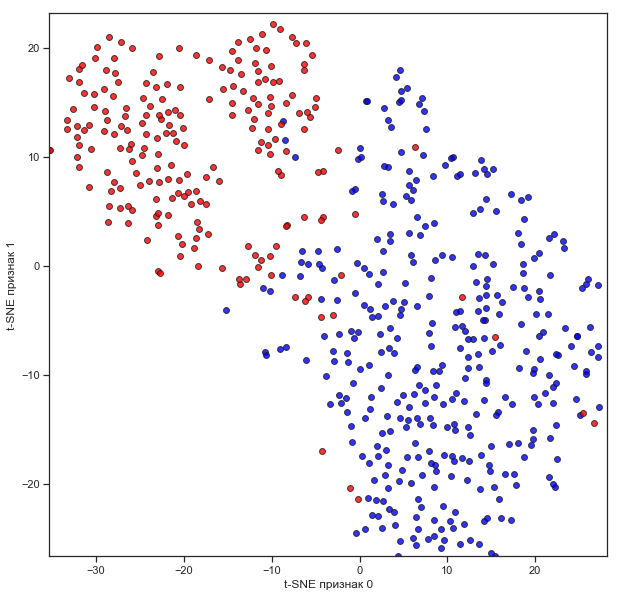

In [15]:
scaler = StandardScaler() 
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

tsne = TSNE(random_state=2)
model_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 10))
colors = ["red", "blue"]
plt.xlim(model_tsne[:, 0].min(), model_tsne[:, 0].max() + 1) 
plt.ylim(model_tsne[:, 1].min(), model_tsne[:, 1].max() + 1) 
for i in range(len(cancer.data)):                                     
    plt.scatter(model_tsne[i, 0], model_tsne[i, 1], 
            marker='o',
            s=35, 
            edgecolor='k', 
            alpha=.8, 
            color = colors[cancer.target[i]]) 
plt.xlabel("t-SNE признак 0")
plt.ylabel("t-SNE признак 1")
plt.show()

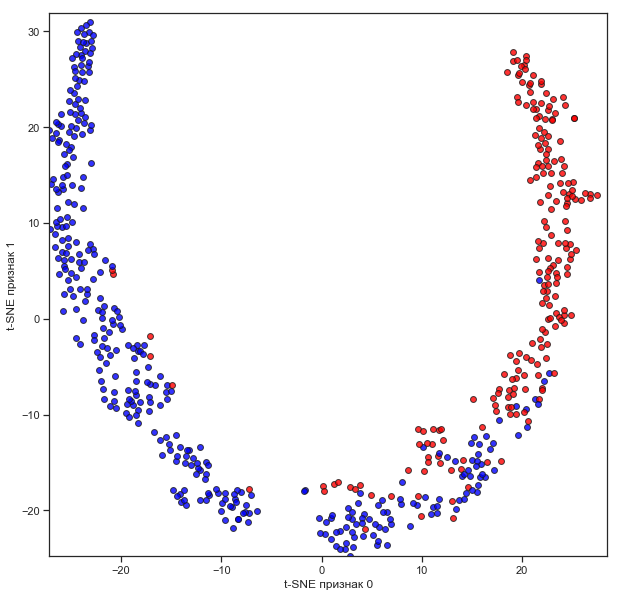

In [16]:
tsne = TSNE(random_state=2)
model_tsne = tsne.fit_transform(cancer.data)

plt.figure(figsize=(10, 10))
colors = ["red", "blue"]
plt.xlim(model_tsne[:, 0].min(), model_tsne[:, 0].max() + 1) 
plt.ylim(model_tsne[:, 1].min(), model_tsne[:, 1].max() + 1) 
for i in range(len(cancer.data)):                                     
    plt.scatter(model_tsne[i, 0], model_tsne[i, 1], 
            marker='o',
            s=35, 
            edgecolor='k', 
            alpha=.8, 
            color = colors[cancer.target[i]]) 
plt.xlabel("t-SNE признак 0")
plt.ylabel("t-SNE признак 1")
plt.show()

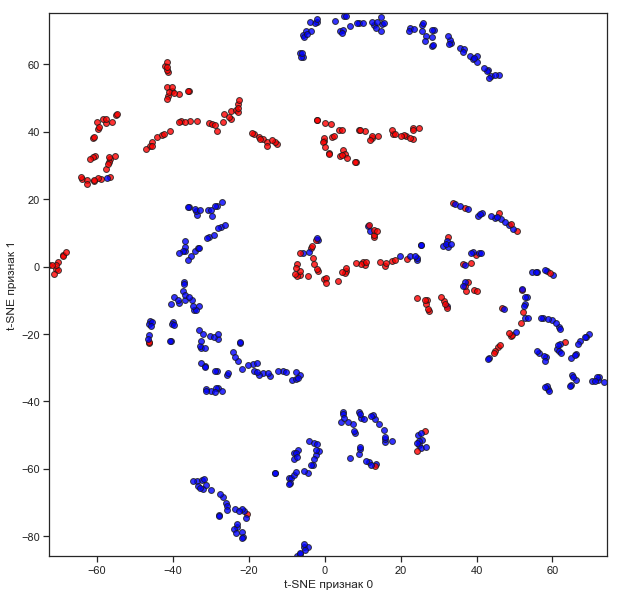

In [17]:
tsne = TSNE(random_state=2, perplexity=5)
model_tsne = tsne.fit_transform(cancer.data)

plt.figure(figsize=(10, 10))
colors = ["red", "blue"]
plt.xlim(model_tsne[:, 0].min(), model_tsne[:, 0].max() + 1) 
plt.ylim(model_tsne[:, 1].min(), model_tsne[:, 1].max() + 1) 
for i in range(len(cancer.data)):
    #              ,                                              
    plt.scatter(model_tsne[i, 0], model_tsne[i, 1], 
            marker='o',
            s=35, 
            edgecolor='k', 
            alpha=.8, 
            color = colors[cancer.target[i]]
            ) 
plt.xlabel("t-SNE признак 0")
plt.ylabel("t-SNE признак 1")
plt.show()

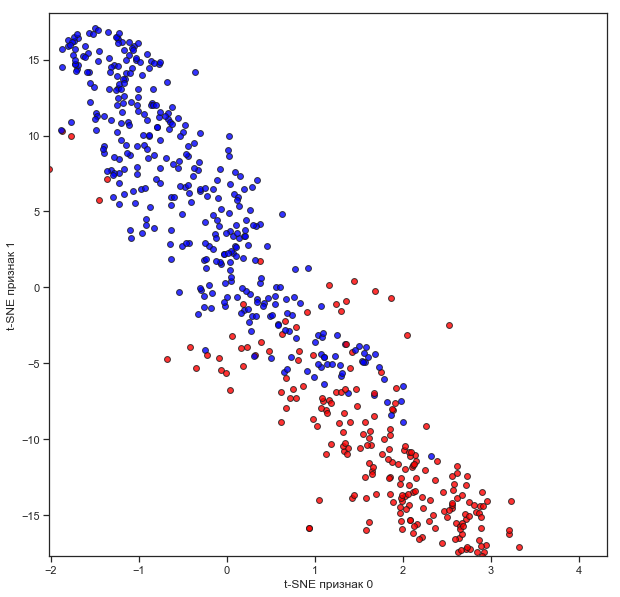

In [18]:
tsne = TSNE(random_state=2, perplexity=100)
model_fit=tsne.fit(cancer.data)
model_tsne = tsne.fit_transform(cancer.data)

plt.figure(figsize=(10, 10))
colors = ["red", "blue"]
plt.xlim(model_tsne[:, 0].min(), model_tsne[:, 0].max() + 1) 
plt.ylim(model_tsne[:, 1].min(), model_tsne[:, 1].max() + 1) 
for i in range(len(cancer.data)):
    #              ,                                              
    plt.scatter(model_tsne[i, 0], model_tsne[i, 1], 
            marker='o',
            s=35, 
            edgecolor='k', 
            alpha=.8, 
            color = colors[cancer.target[i]]
            ) 
plt.xlabel("t-SNE признак 0")
plt.ylabel("t-SNE признак 1")
plt.show()


Много интересного смотрим тут
https://distill.pub/2016/misread-tsne/